In [12]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


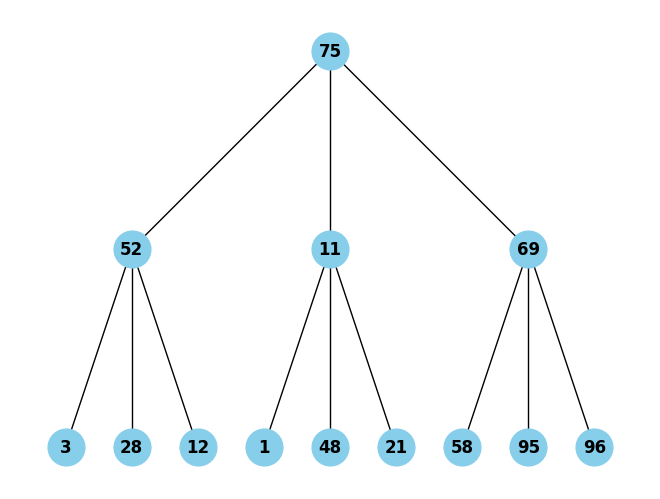

In [23]:
import random
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, value):
        self.value = value
        self.children = [None, None, None]

def create_binary_tree(depth):
    if depth == 0:
        return None
    else:
        root = Node(random.randint(1, 100))
        root.children[0] = create_binary_tree(depth - 1)
        root.children[1] = create_binary_tree(depth - 1)
        root.children[2] = create_binary_tree(depth - 1)
        return root

def graph_tree(node, G, parent_name='', pos=None, level=0, width=2., vert_gap=0.4, xcenter=0.5):
    if pos is None:
        pos = {node.value: (xcenter, 1 - level * vert_gap)}
    else:
        pos[node.value] = (xcenter, 1 - level * vert_gap)
    neighbors = [child for child in node.children if child is not None]
    if len(neighbors) != 0:
        dx = width / len(neighbors)
        nextx = xcenter - width/2 - dx/2
        for neighbor in neighbors:
            nextx += dx
            pos = graph_tree(neighbor, G=G, parent_name=node.value, pos=pos, level=level+1, width=dx, xcenter=nextx)
    return pos

def draw_binary_tree(tree_root):
    G = nx.Graph()
    add_edges(G, tree_root)
    pos = graph_tree(tree_root, G, xcenter=0.5)
    labels = {value: value for value in G.nodes()}
    nx.draw(G, pos=pos, labels=labels, with_labels=True, node_size=700, node_color='skyblue', font_color='black', font_weight='bold')
    plt.show()

def add_edges(G, node):
    if node is not None:
        for child in node.children:
            if child is not None:
                G.add_edge(node.value, child.value)
                add_edges(G, child)

# Create a binary tree with depth 3
tree_root = create_binary_tree(3)

# Draw the binary tree
draw_binary_tree(tree_root)
